In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv(r"C:\Users\basil\OneDrive\Escritorio\Ironhack\labs\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#filtering the data not including customer
customer_f = customer_df.drop('Customer', axis=1)
customer_f

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#renaming the columns in lower case and separated by undercores
customer_f.columns = [column.lower().replace(' ', '_') for column in customer_f.columns]

In [5]:
#check information about the df 
customer_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employmentstatus               9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [6]:
#transform effective_to_date in a datetime type
if 'effective_to_date' in customer_f.columns:
    customer_f['effective_to_date'] = pd.to_datetime(customer_f['effective_to_date'])

In [7]:
# divide the continue and discete variaable
numerical_df = customer_f.select_dtypes("number")
categorical_df = customer_f.select_dtypes("object")

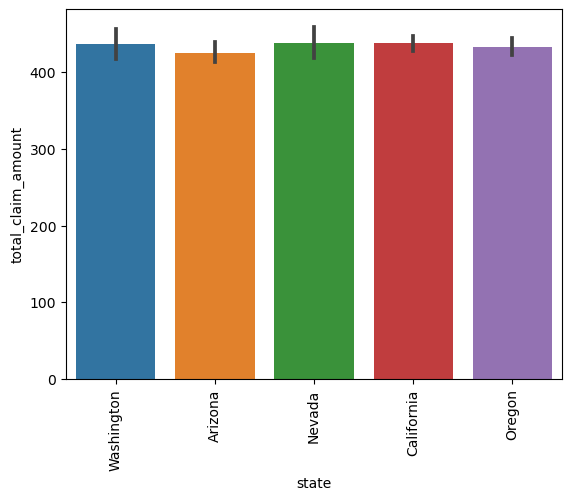

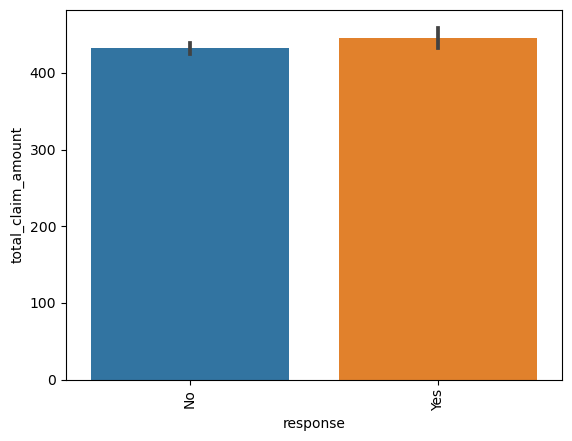

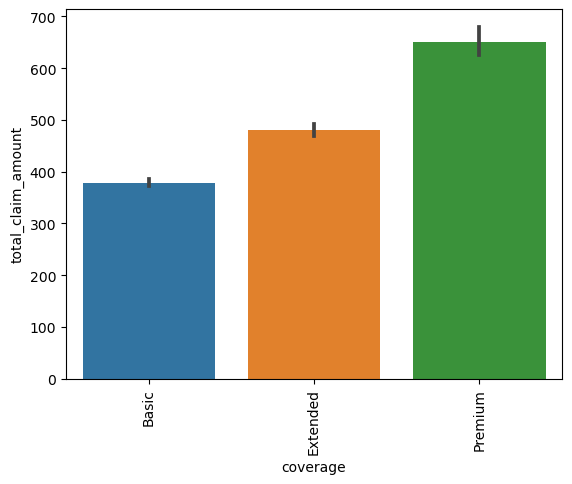

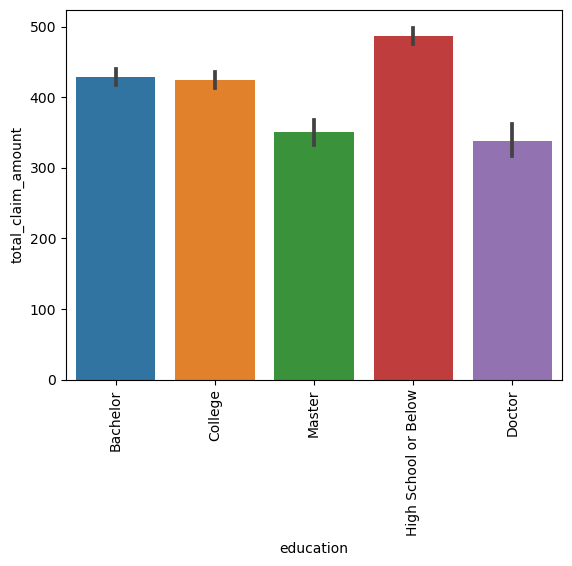

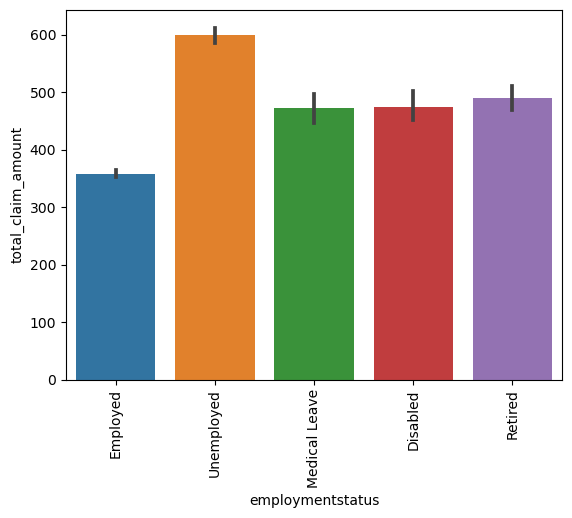

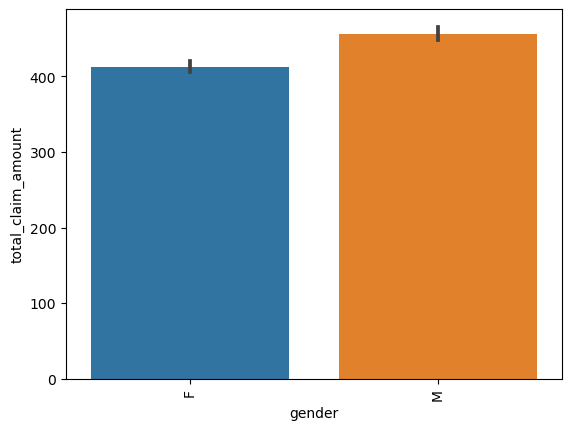

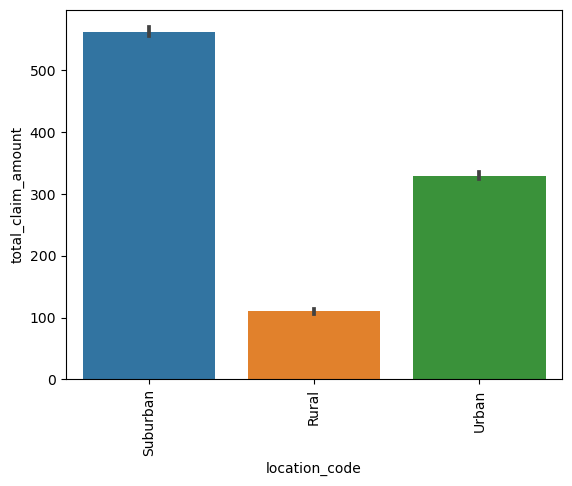

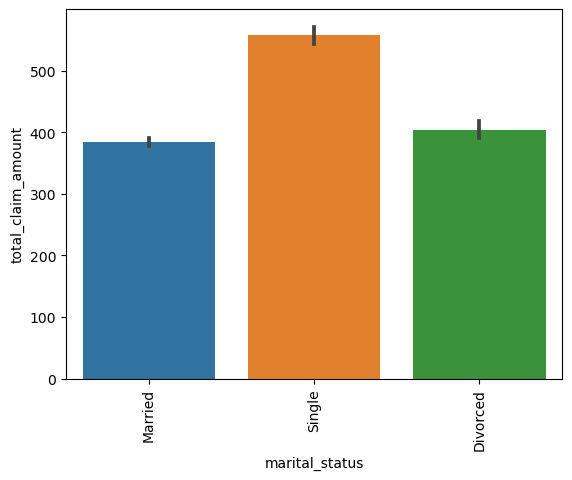

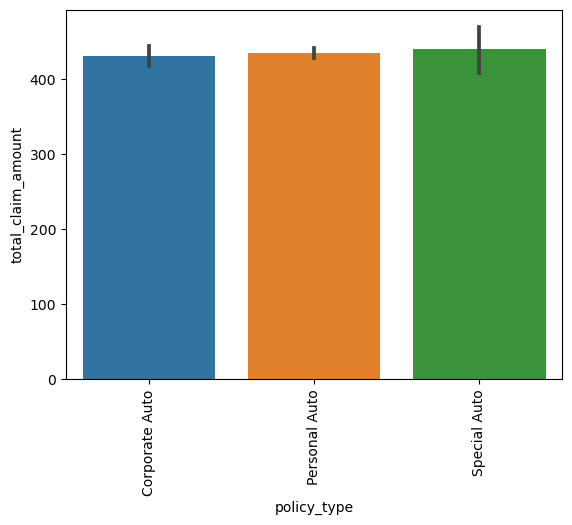

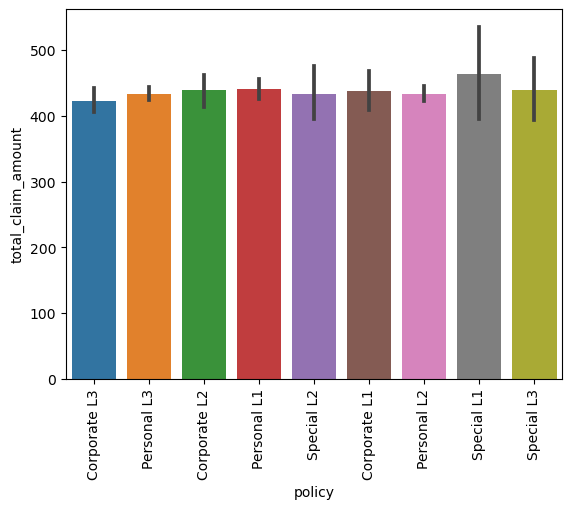

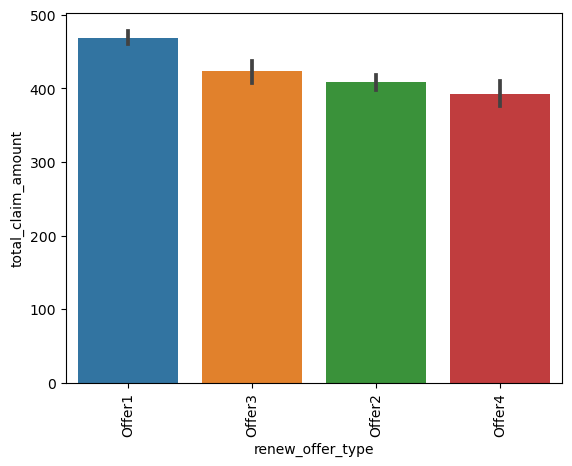

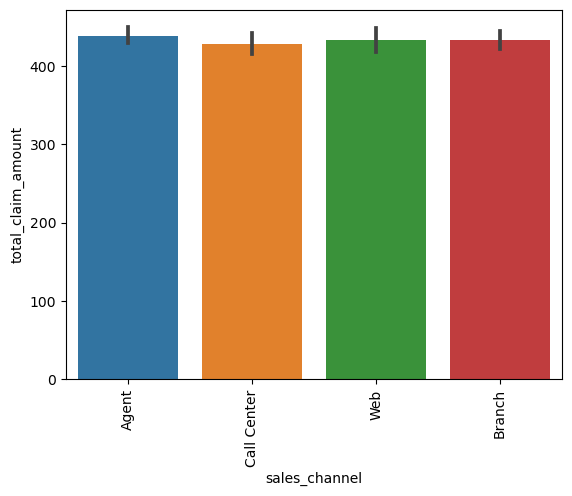

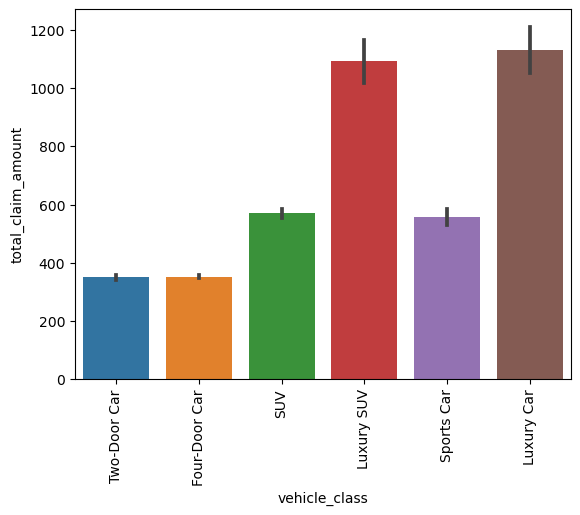

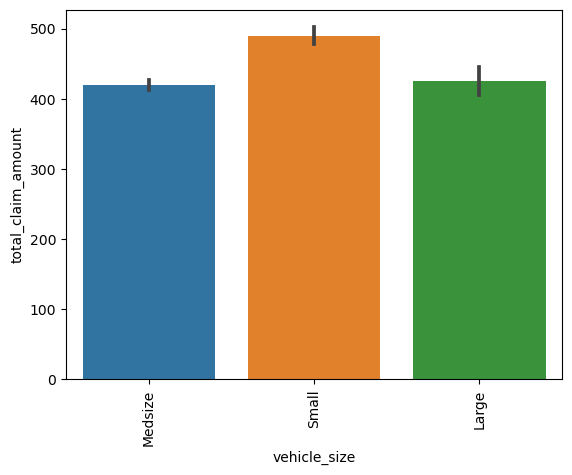

In [8]:
#plotting all the categorical variable having x-axis "total claim amount". 
for col in categorical_df.columns:
  sns.barplot(x=categorical_df[col], y=customer_f["total_claim_amount"])
  plt.xticks(rotation=90)
  plt.show()




In [9]:
# quick look at categorical variables:
for col in categorical_df.select_dtypes('object'):
  display(categorical_df[col].value_counts())
  print()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [10]:
customer_f['employmentstatus'].value_counts()

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [11]:
customer_f['employmentstatus'] = customer_f['employmentstatus'].apply(lambda x: 'other' if x not in ['Employed', 'Unemployed'] else x)
customer_f['employmentstatus'].value_counts()

employmentstatus
Employed      5698
Unemployed    2317
other         1119
Name: count, dtype: int64

In [12]:
customer_f['policy'].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

In [13]:
customer_f2 = customer_f.drop("policy", axis=1)
customer_f2['policy_1'] = customer_f['policy'].apply(lambda x: x.split(" ")[0])
customer_f2['policy_2'] = customer_f['policy'].apply(lambda x: x.split(" ")[1][1])
customer_f2[['policy_1', 'policy_2']]

,policy_1,policy_2
0,Corporate,3
1,Personal,3
2,Personal,3
3,Corporate,2
4,Personal,1
...,...,...
9129,Personal,1
9130,Corporate,3
9131,Corporate,2
9132,Personal,2


In [24]:
categoricals = customer_f.select_dtypes("object")
categoricals.head()


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


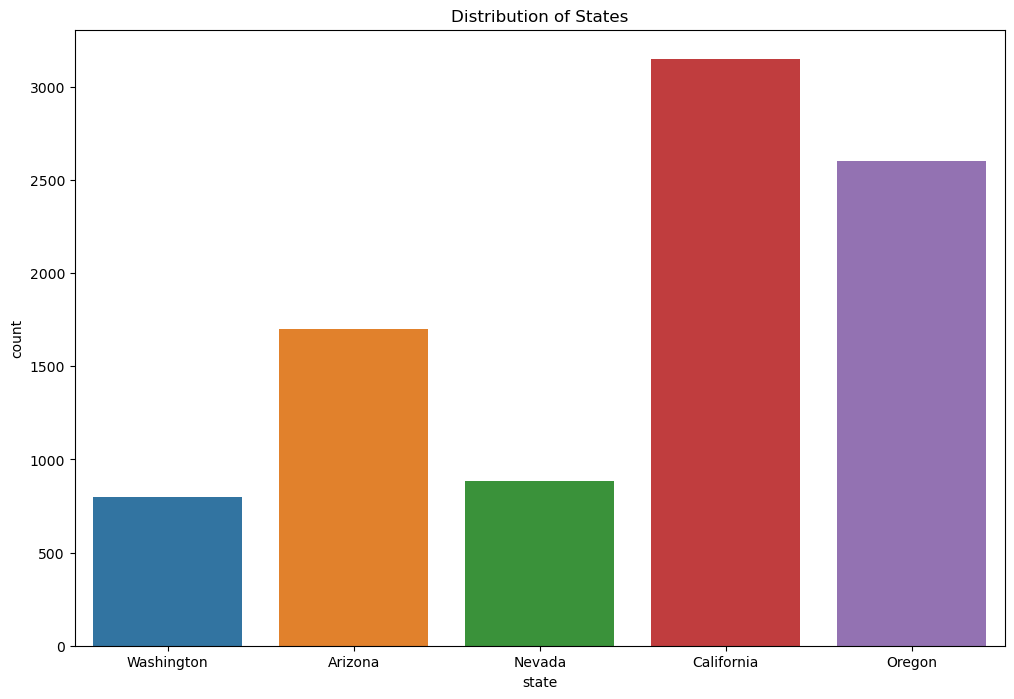

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='state')

plt.title('Distribution of States')
plt.show()

#The chart illustrates the distribution of insurance policies among different states, highlighting the regions where these policies are most prevalent. Upon closer inspection of the chart, it is evident that California has the highest concentration of policies, whereas Washington has the lowest number of policies.

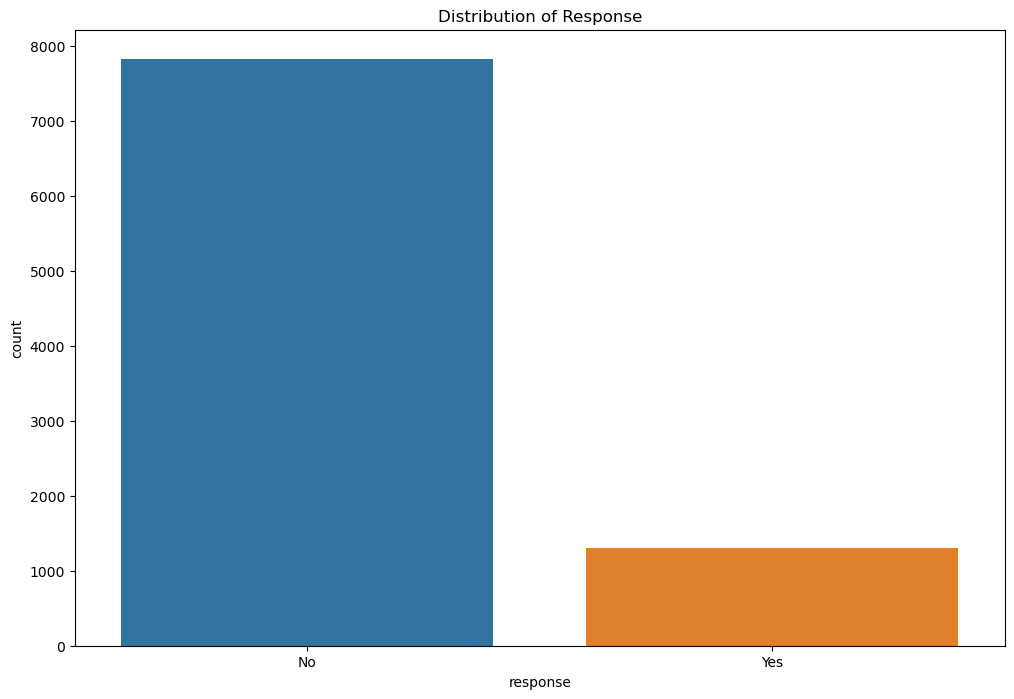

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='response')

plt.title('Distribution of Response')
plt.show()

#The chart depicts the distribution of responses, likely associated with policies. It is noticeable that the majority of responses lean towards the "no" category.

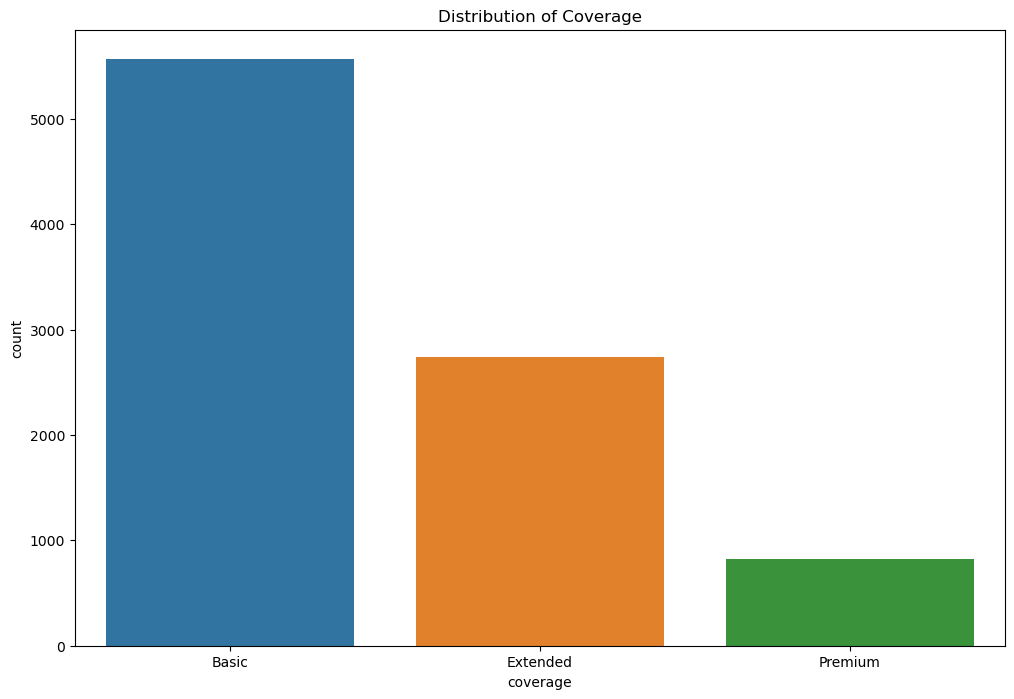

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='coverage')

plt.title('Distribution of Coverage')
plt.show()

#In this case, the chart illustrates the distribution of policy coverage. It is apparent that the majority of clients have opted for basic coverage.

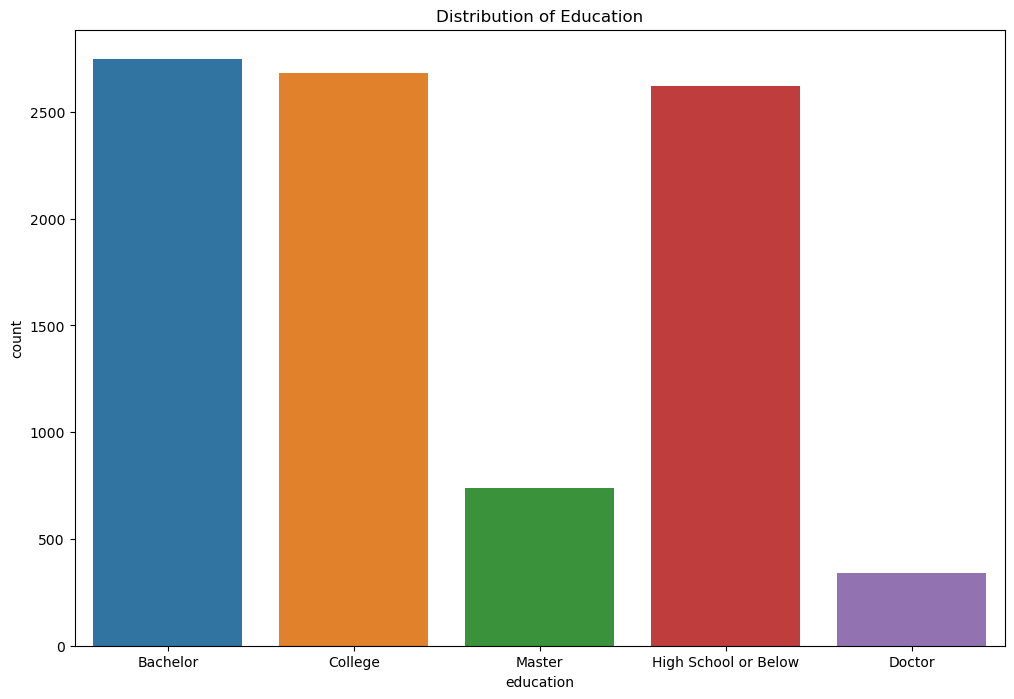

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='education')

plt.title('Distribution of Education')
plt.show()


#Upon examining the chart that analyzes customer education, it is evident that a significant portion of them holds a bachelor's degree, followed by those with a college education and high school diploma or below.

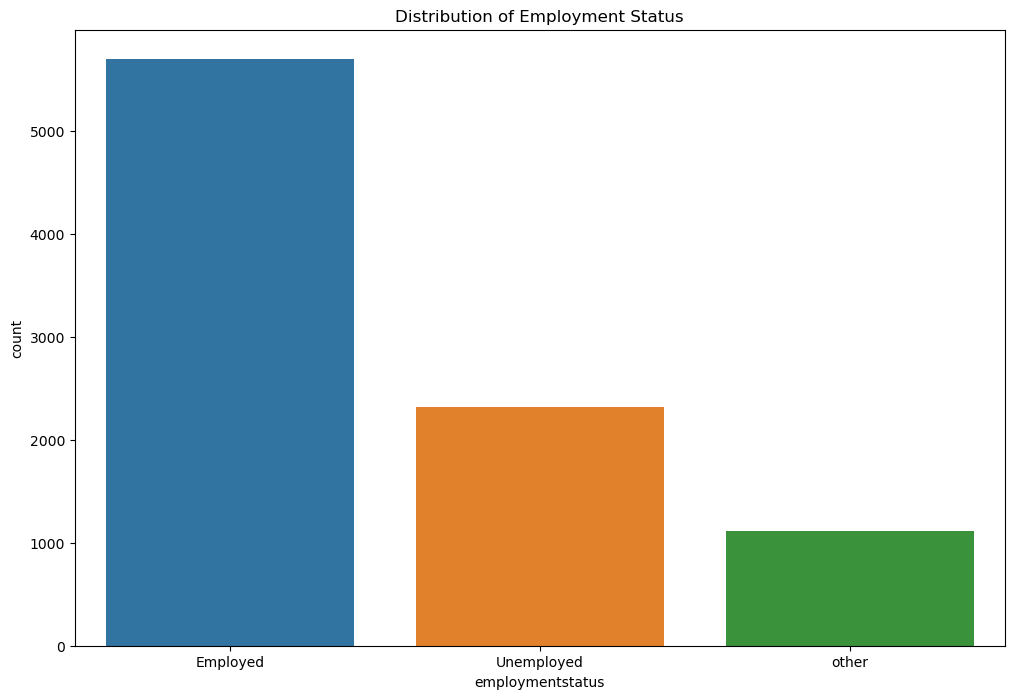

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='employmentstatus')

plt.title('Distribution of Employment Status')
plt.show()

#The chart displays the distribution of customers' employment status, revealing that the majority of them are employed.

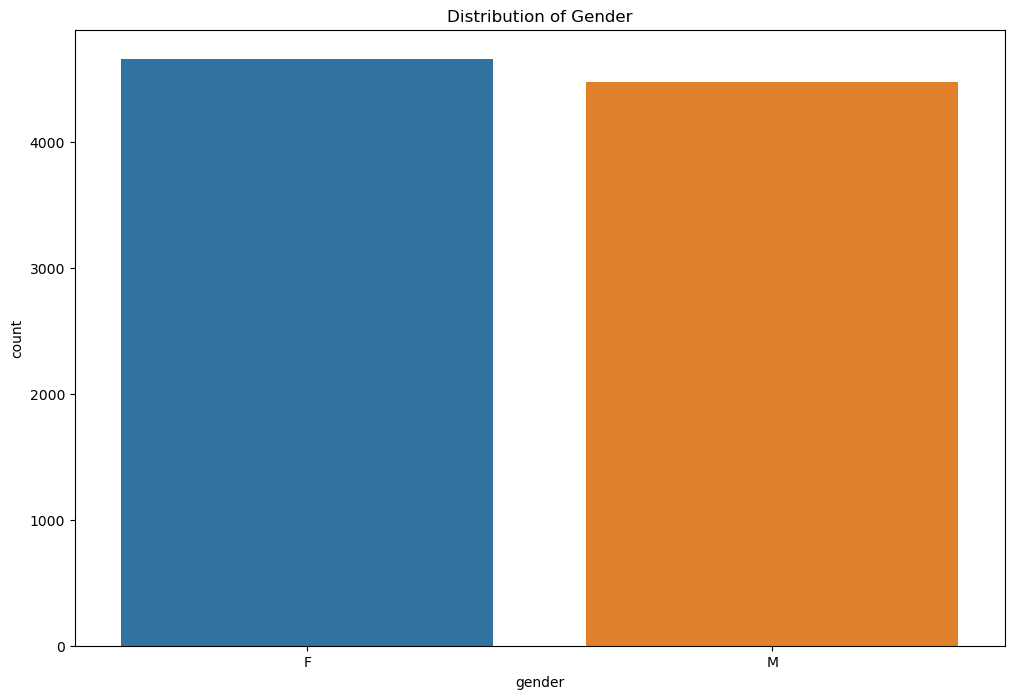

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='gender')

plt.title('Distribution of Gender')
plt.show()


#Regarding the gender of the customers, it is apparent that sex does not play a significant role for them. There is a relatively small gap between the two analyzed genders, with females slightly outnumbering males.

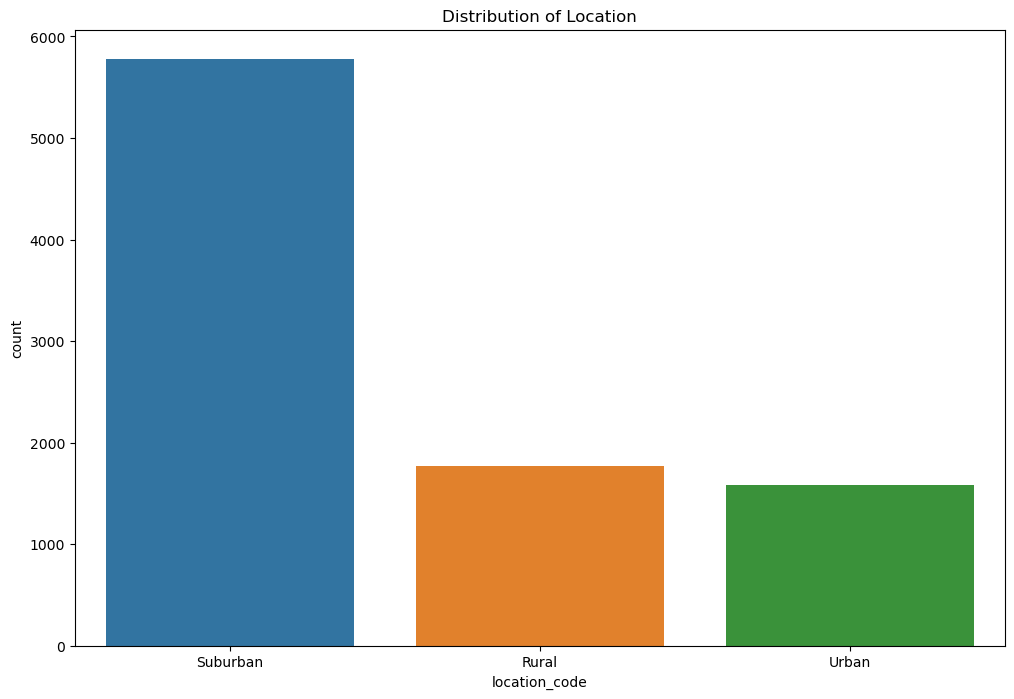

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='location_code')

plt.title('Distribution of Location')
plt.show()

#Primarily, the majority of customers hail from suburban areas, followed by those from rural areas, with urban areas having the smallest representation.

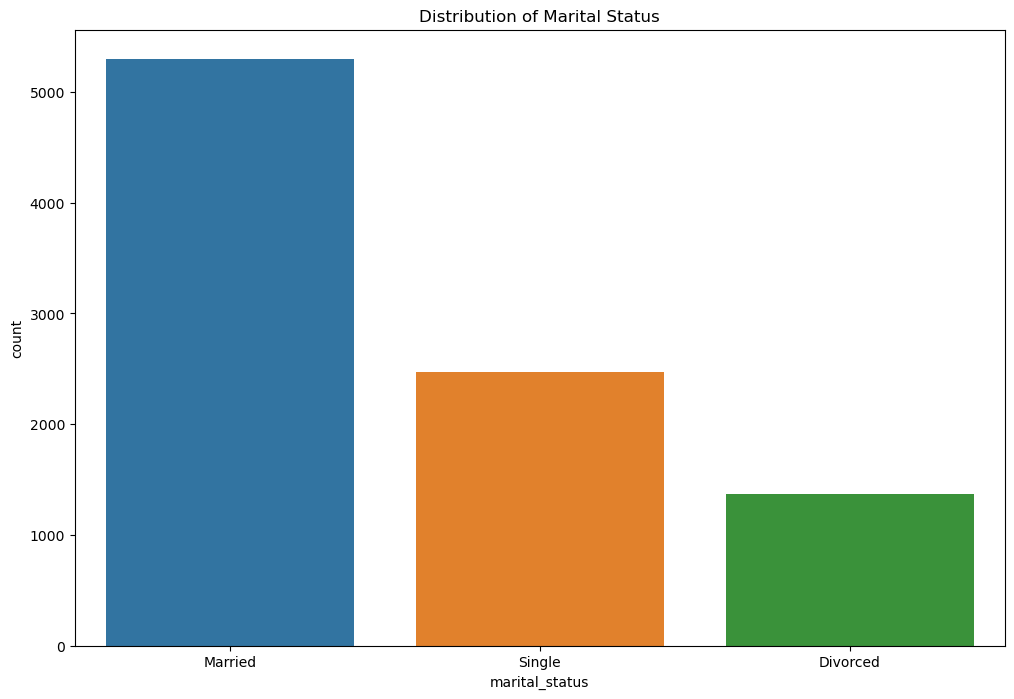

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='marital_status')

plt.title('Distribution of Marital Status')
plt.show()


#Observing the distribution of marital status, it is evident that the majority of customers are married, followed by single individuals, with divorced individuals constituting the smallest group.

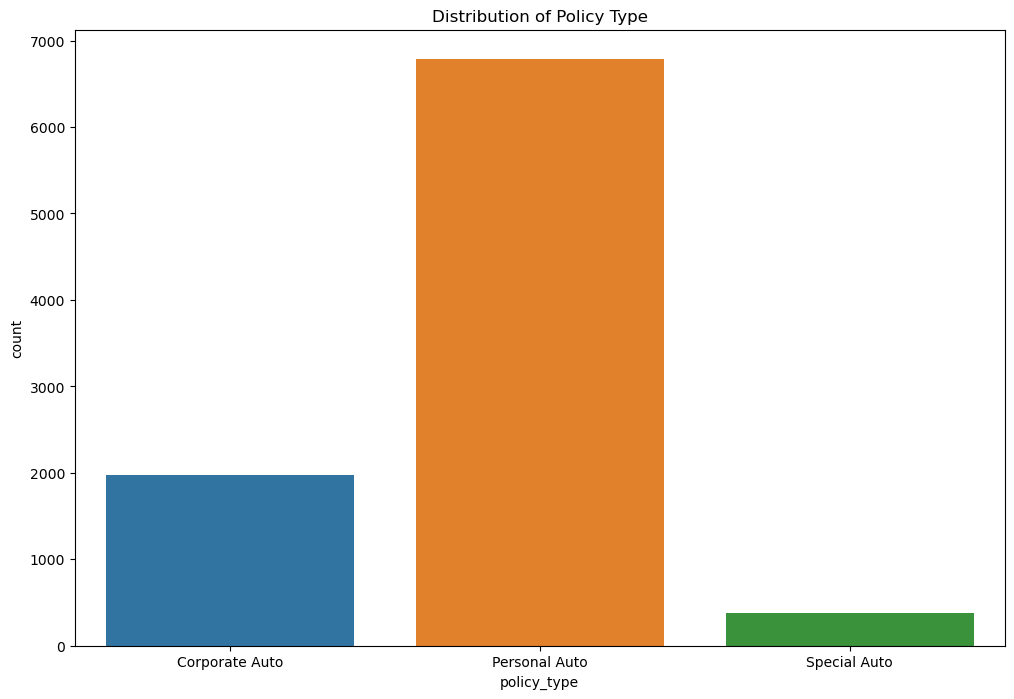

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='policy_type')

plt.title('Distribution of Policy Type')
plt.show()

# The chart illustrates the distribution of policy types among customers, revealing that the majority are for personal use, followed by corporate auto.

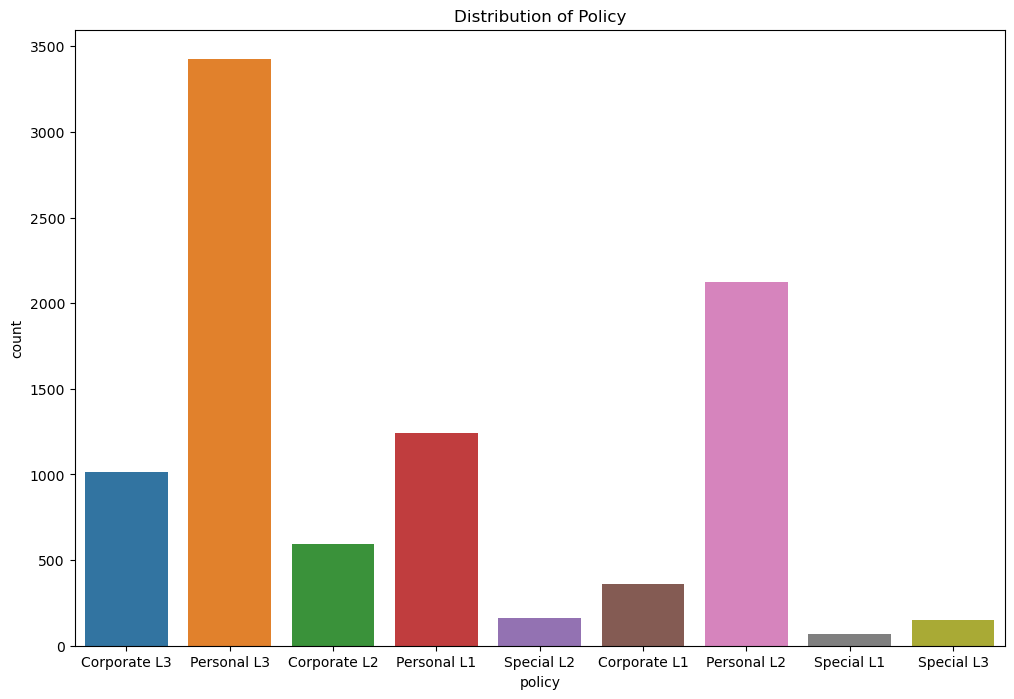

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='policy')

plt.title('Distribution of Policy')
plt.show()

#The chart reveals the distribution of policy types among customers. It is evident that the majority of customers opt for a personal L3 policy, while the least selected policy is the special L1.

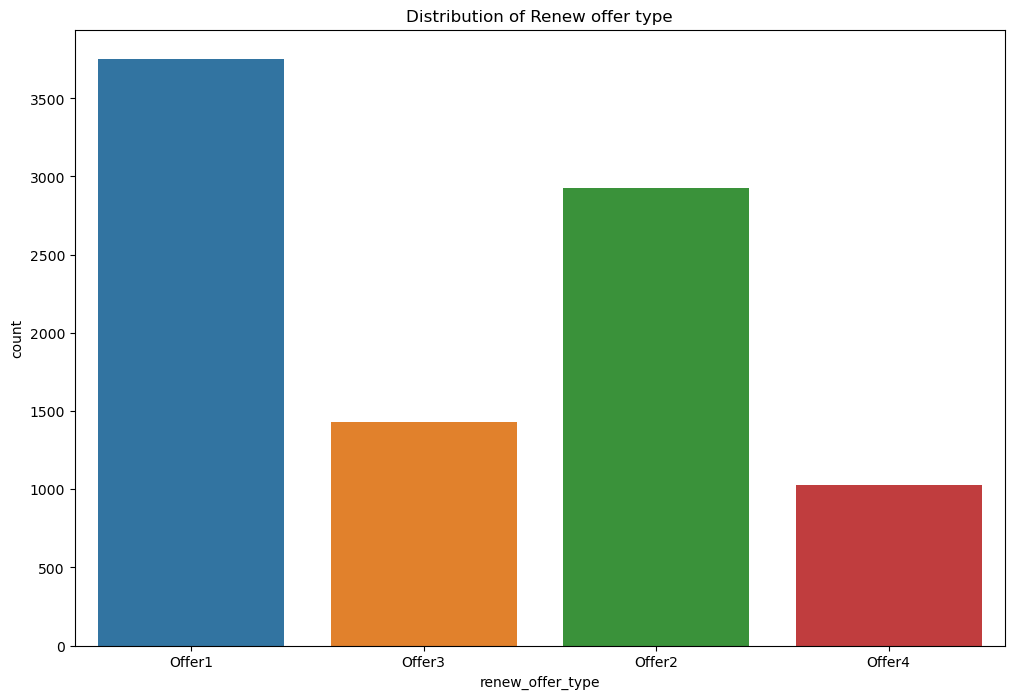

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='renew_offer_type')

plt.title('Distribution of Renew offer type')
plt.show()

#The chart depicts the distribution of renew offer types, indicating that the most successful one is Offer 1, followed by Offer 2. Offer 4, on the other hand, has the lowest participation.

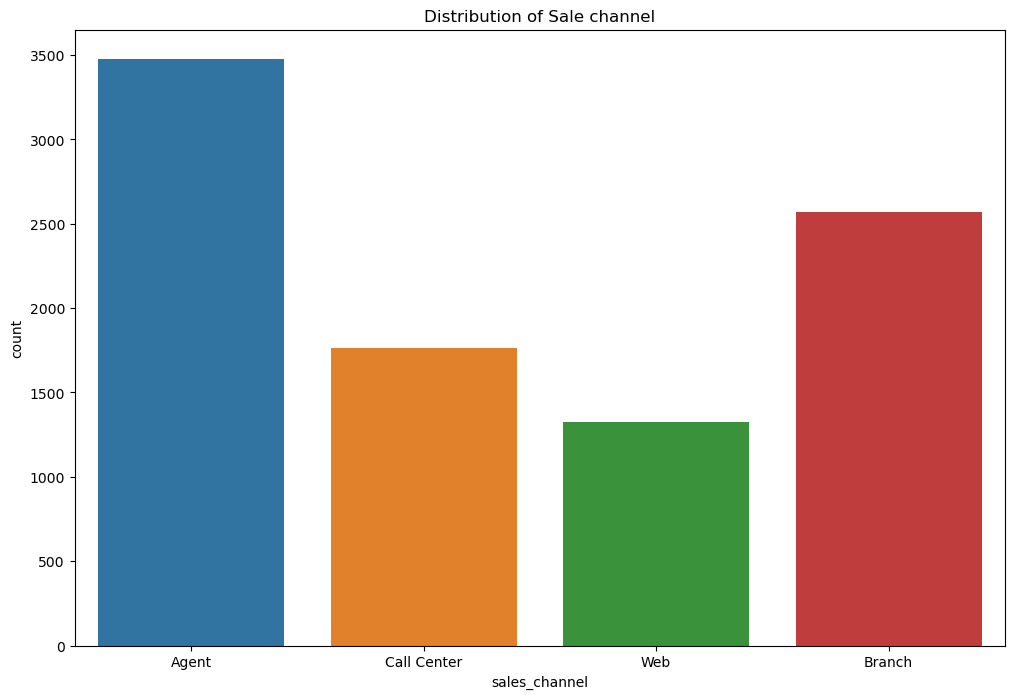

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='sales_channel')

plt.title('Distribution of Sale channel')
plt.show()

#The distribution of sales channels indicates that the most effective model has been through agents, followed by branches and call centers. It appears that the web channel has captured the least number of clients.

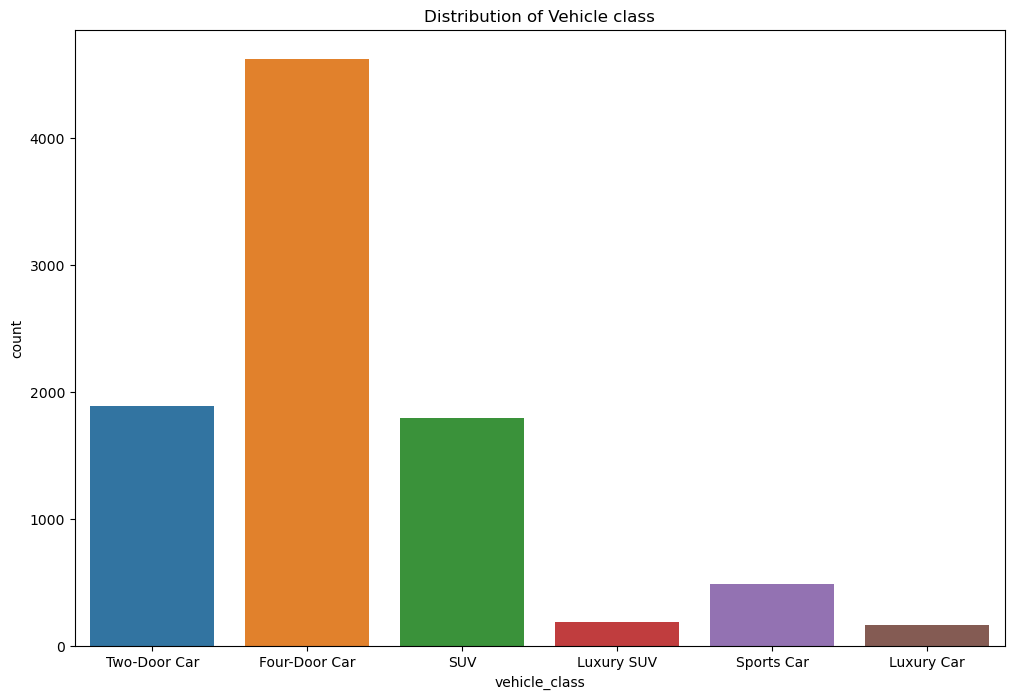

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='vehicle_class')

plt.title('Distribution of Vehicle class')
plt.show()

#we can observe that the majority of policies cover four-door cars. Luxury cars, on the other hand, are the least represented type of vehicles.

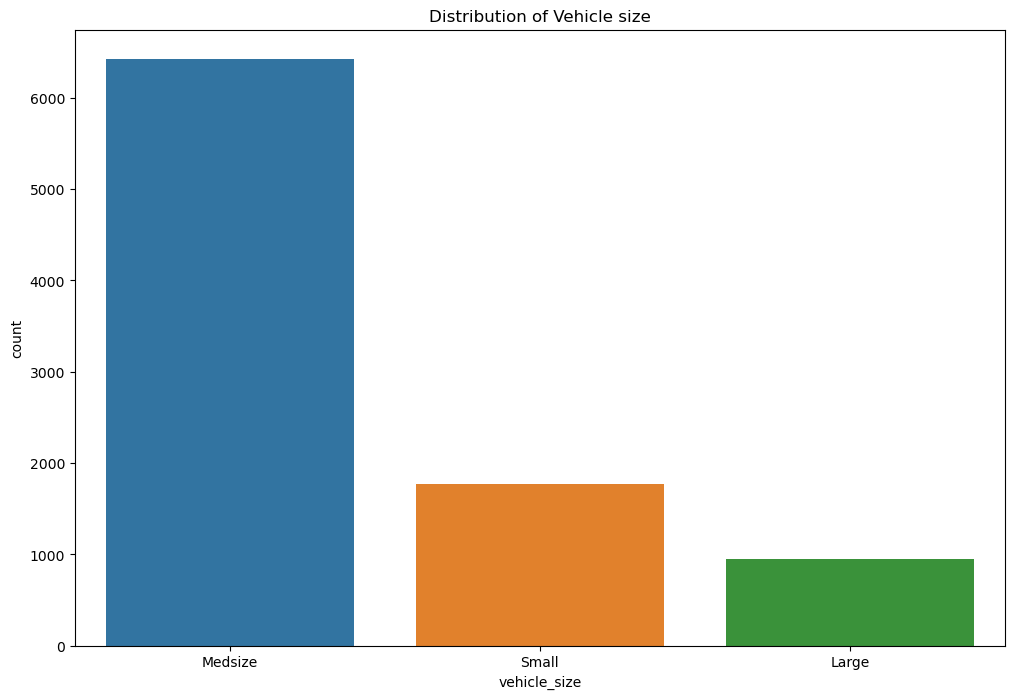

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=customer_f, x='vehicle_size')

plt.title('Distribution of Vehicle size')
plt.show()

#The majority of insurance customers have coverage for medium-sized cars.

In [45]:
#Small summary of the categorial data: The charts provide a comprehensive overview of various aspects related to insurance policies and customer demographics. In terms of geographical distribution, California stands out with the highest concentration of policies, while Washington has the lowest. Examining responses associated with policies reveals a prevalent trend toward the "no" category. Clients predominantly opt for basic coverage, and education-wise, a significant portion holds a bachelor's degree, followed by those with a college education and high school diploma or below.Employment status indicates that the majority of customers are employed, and gender doesn't play a significant role, with a slight female majority. Suburban areas host the majority of customers, followed by rural areas, while urban areas have the smallest representation. Marital status shows that the majority are married, followed by single individuals, with divorced individuals constituting the smallest group.Analyzing policy types unveils a preference for personal use policies, notably L3, while the least selected is the special L1. Renew offer types showcase the most success with Offer 1, followed by Offer 2, whereas Offer 4 has the lowest participation. Sales channels reveal that agent interactions are the most effective, followed by branches and call centers, with the web channel capturing the least number of clients. Vehicle coverage predominantly focuses on four-door cars, while luxury cars are the least represented. Finally, the majority of insurance customers opt for coverage for medium-sized cars.

In [46]:
#checking if there are some reduntant columns among categorical data
customer_f['policy'].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

In [47]:
customer_f['policy_type'].value_counts()

#checking for redundant columns within categorical data: both "policy" and "policy_type" offer very similar information. To ensure the most comprehensive dataset, it is advisable to remove the "policy type" column in this case.
#customer_f = customer_f.drop("policy_", axis=1)

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

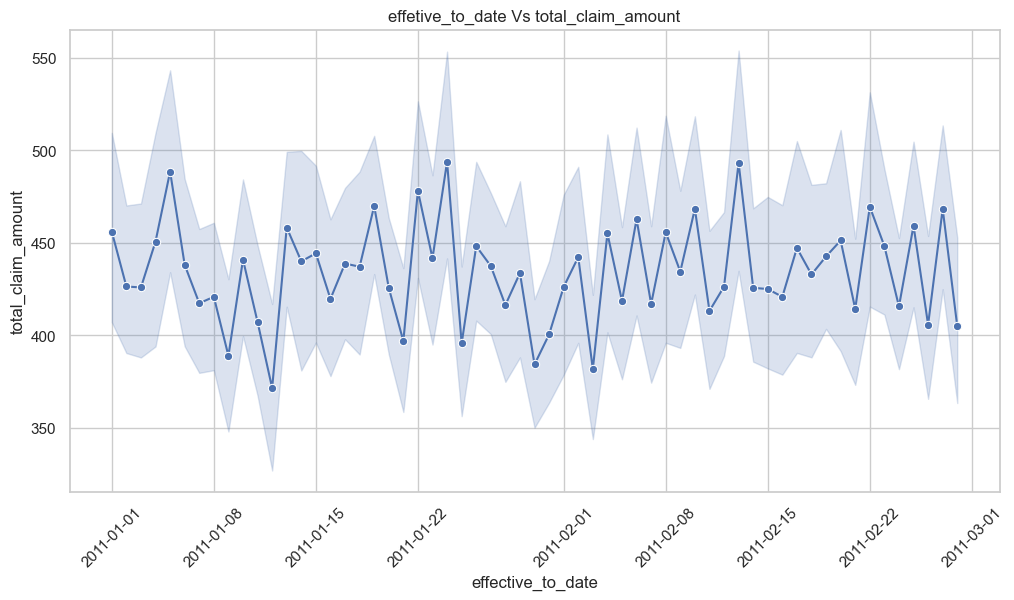

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'customer_f' es tu DataFrame y 'effective_to_date' es la variable de fecha y hora
customer_f['effective_to_date'] = pd.to_datetime(customer_f['effective_to_date'])

# Configurar el estilo de seaborn (opcional)
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))  # Ajusta el tamaño según sea necesario

# Reemplaza 'variable_of_interest' con el nombre real de tu variable en el eje Y
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_f, marker='o', color='b')

# Personalizar el gráfico
plt.title('effetive_to_date Vs total_claim_amount')
plt.xlabel('effective_to_date')
plt.ylabel('total_claim_amount')  # Reemplaza 'variable_of_interest' con el nombre real de tu variable

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


#from the graph we can observe that there is no discernible seasonality associated with the total claim amount.